<a href="https://colab.research.google.com/github/iannstronaut/WildFire/blob/Experimental/Wildfire_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wildfire with CNN

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
from PIL import Image
from PIL import ImageFile
import numpy as np

# Izinkan pemuatan gambar terpotong
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Path ke folder Wildfire
base_dir = "/content/drive/MyDrive/Wildfire/train"

# Inisialisasi array untuk menyimpan gambar dan label
data = []

# Loop untuk membaca gambar dari subfolder 'wildfire' dan 'nowildfire'
for label in ['wildfire', 'nowildfire']:
    folder_path = os.path.join(base_dir, label)  # Path ke subfolder
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            img_path = os.path.join(folder_path, filename)

            # Buka gambar menggunakan PIL
            img = Image.open(img_path)

            img = img.resize((50, 50))

            # Konversi gambar ke array numpy
            img_np = np.array(img)

            # Tambahkan gambar dan label ke array data
            data.append({
                'label': label,
                'image': img_np
            })

# Jumlah gambar yang berhasil dimuat
print(f"{len(data)} images loaded from folders 'wildfire' and 'nowildfire'.")


30251 images loaded from folders 'wildfire' and 'nowildfire'.


In [3]:
base_dir = "/content/drive/MyDrive/Wildfire/test"

# Inisialisasi array untuk menyimpan gambar dan label
test = []

# Loop untuk membaca gambar dari subfolder 'wildfire' dan 'nowildfire'
for label in ['wildfire', 'nowildfire']:
    folder_path = os.path.join(base_dir, label)  # Path ke subfolder
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            img_path = os.path.join(folder_path, filename)

            # Buka gambar menggunakan PIL
            img = Image.open(img_path)

            img = img.resize((50, 50))

            # Konversi gambar ke array numpy
            img_np = np.array(img)

            # Tambahkan gambar dan label ke array data
            test.append({
                'label': label,
                'image': img_np
            })

# Jumlah gambar yang berhasil dimuat
print(f"{len(test)} images loaded from folders 'wildfire' and 'nowildfire'.")


6300 images loaded from folders 'wildfire' and 'nowildfire'.


In [4]:
X_train = np.array([entry['image'] for entry in data])
y_train = np.array([entry['label'] for entry in data])

In [5]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y_train)
# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_train, y_encoded, test_size=0.2, random_state=42)
# Ubah label menjadi kategorikal
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(f"Shape of X_train: {X_train.shape}, Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}, Shape of y_test: {y_test.shape}")

Shape of X_train: (24200, 50, 50, 3), Shape of X_test: (6051, 50, 50, 3)
Shape of y_train: (24200, 2), Shape of y_test: (6051, 2)


In [9]:
# Membangun model CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Regularisasi
model.add(Dense(2, activation='softmax'))  # 2 kelas (wildfire, nowildfire)

# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Melatih model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
605/605 [==============================] - 11s 16ms/step - loss: 0.4154 - accuracy: 0.8721 - val_loss: 0.2535 - val_accuracy: 0.8952
Epoch 2/50
605/605 [==============================] - 9s 15ms/step - loss: 0.2598 - accuracy: 0.9022 - val_loss: 0.2380 - val_accuracy: 0.9045
Epoch 3/50
605/605 [==============================] - 9s 15ms/step - loss: 0.2335 - accuracy: 0.9127 - val_loss: 0.2171 - val_accuracy: 0.9153
Epoch 4/50
605/605 [==============================] - 9s 16ms/step - loss: 0.2158 - accuracy: 0.9190 - val_loss: 0.2090 - val_accuracy: 0.9163
Epoch 5/50
605/605 [==============================] - 10s 16ms/step - loss: 0.2023 - accuracy: 0.9261 - val_loss: 0.2092 - val_accuracy: 0.9165
Epoch 6/50
605/605 [==============================] - 10s 16ms/step - loss: 0.1979 - accuracy: 0.9251 - val_loss: 0.1863 - val_accuracy: 0.9267
Epoch 7/50
605/605 [==============================] - 9s 16ms/step - loss: 0.1882 - accuracy: 0.9295 - val_loss: 0.2040 - val_accuracy: 0.9

In [10]:
# Evaluasi model pada data uji
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Akurasi model: {accuracy:.2f}")

# Menampilkan laporan klasifikasi
print(classification_report(y_test_classes, y_pred_classes, target_names=le.classes_.astype(str)))

190/190 [==============================] - 1s 6ms/step
Akurasi model: 0.92
              precision    recall  f1-score   support

  nowildfire       0.88      0.96      0.92      2868
    wildfire       0.96      0.88      0.92      3183

    accuracy                           0.92      6051
   macro avg       0.92      0.92      0.92      6051
weighted avg       0.92      0.92      0.92      6051



In [11]:
# Pastikan gambar memiliki ukuran yang sesuai dan labelnya benar
X_test_another = np.array([entry['image'] for entry in test])
y_test_another = np.array([entry['label'] for entry in test])

# Encode label
le = LabelEncoder()
y_encoded = le.fit_transform(y_test_another)  # Ini harus dilakukan pada data yang sama
y_test_classes = y_encoded  # Simpan kelas y_test yang sudah diencode

# Prediksi
y_pred = model.predict(X_test_another)
y_pred_classes = np.argmax(y_pred, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Akurasi model: {accuracy:.2f}")

# Menampilkan laporan klasifikasi
print(classification_report(y_test_classes, y_pred_classes, target_names=le.classes_.astype(str)))


197/197 [==============================] - 1s 6ms/step
Akurasi model: 0.91
              precision    recall  f1-score   support

  nowildfire       0.85      0.97      0.91      2820
    wildfire       0.97      0.86      0.92      3480

    accuracy                           0.91      6300
   macro avg       0.91      0.92      0.91      6300
weighted avg       0.92      0.91      0.91      6300



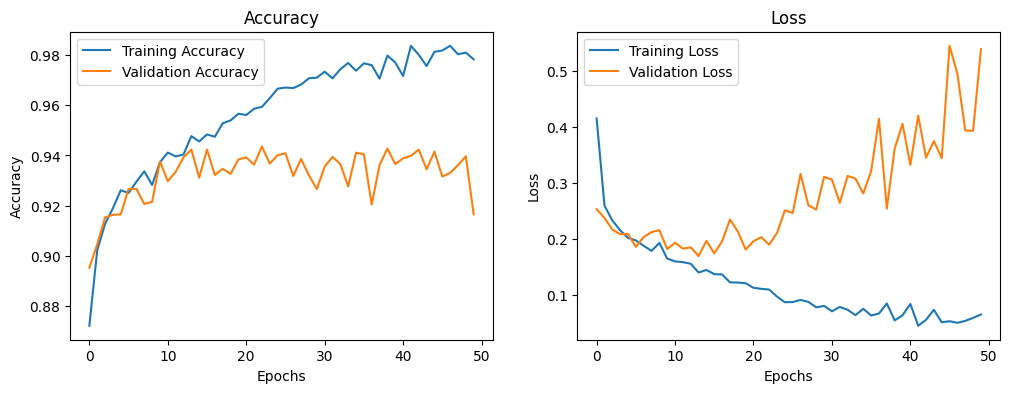

In [12]:
# Grafik akurasi dan loss
plt.figure(figsize=(12, 4))

# Grafik akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Grafik loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
